In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv("/kaggle/input/medals/country_medals_ml (1).csv")
df.head()


,year,country_name,medal_type,count,past_medals,avg_last_3,delta
0,2008,Afghanistan,BRONZE,1,0.0,0.000000,0.0
1,2012,Afghanistan,BRONZE,1,1.0,0.000000,0.0
2,1984,Algeria,BRONZE,2,2.0,0.000000,0.0
3,1992,Algeria,BRONZE,1,2.0,0.000000,-1.0
4,1992,Algeria,GOLD,1,3.0,1.333333,0.0


In [8]:
df.shape
df.describe()
df.isnull().sum()


year            0
country_name    0
medal_type      0
count           0
past_medals     0
avg_last_3      0
delta           0
dtype: int64

In [9]:
df_pivot = df.pivot_table(
    index=["year","country_name"],
    columns="medal_type",
    values="count",
    fill_value=0
).reset_index()


In [11]:
df_pivot["medals"] = (
    df_pivot.get("GOLD",0) +
    df_pivot.get("SILVER",0) +
    df_pivot.get("BRONZE",0)
)


In [12]:
top25 = (
    df_pivot.groupby("country_name")["medals"]
    .sum()
    .sort_values(ascending=False)
    .head(25)
)

top25


country_name
United States of America                2942.0
Soviet Union                            1197.0
Germany                                 1046.0
Great Britain                            940.0
France                                   881.0
Italy                                    756.0
People's Republic of China               710.0
Sweden                                   670.0
Japan                                    569.0
Australia                                566.0
Norway                                   566.0
Russian Federation                       553.0
Canada                                   548.0
German Democratic Republic (Germany)     519.0
Hungary                                  518.0
Finland                                  475.0
Netherlands                              467.0
Switzerland                              370.0
Republic of Korea                        365.0
Austria                                  342.0
Poland                                   321.0


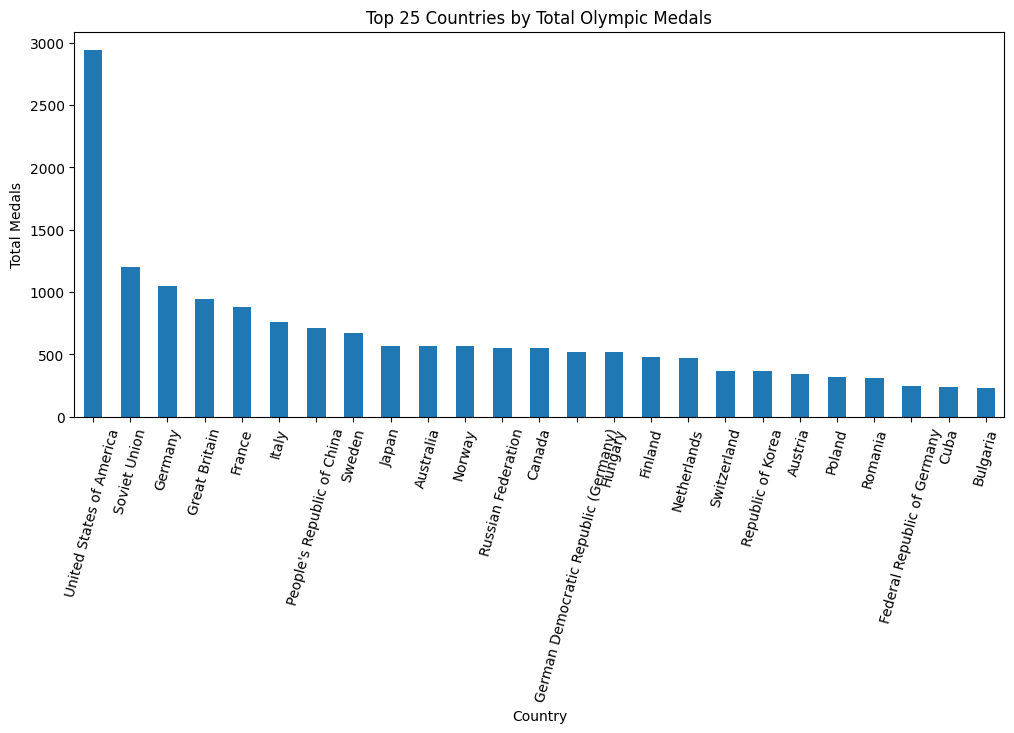

In [13]:
plt.figure(figsize=(12,5))
top25.plot(kind="bar")
plt.title("Top 25 Countries by Total Olympic Medals")
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.xticks(rotation=75)
plt.show()


In [14]:
europe_countries = [
    "France","Germany","Italy","Spain","United Kingdom","Netherlands","Belgium",
    "Sweden","Norway","Finland","Denmark","Switzerland","Austria","Poland",
    "Czech Republic","Slovakia","Hungary","Romania","Bulgaria","Greece",
    "Portugal","Ireland","Ukraine","Russia","Belarus","Serbia","Croatia",
    "Slovenia","Estonia","Latvia","Lithuania","Iceland","Luxembourg"
]
df_europe = df_pivot[df_pivot["country_name"].isin(europe_countries)]


In [15]:
europe_rank = (
    df_europe.groupby("country_name")["medals"]
    .sum()
    .sort_values(ascending=False)
)

europe_rank


country_name
Germany           1046.0
France             881.0
Italy              756.0
Sweden             670.0
Norway             566.0
Hungary            518.0
Finland            475.0
Netherlands        467.0
Switzerland        370.0
Austria            342.0
Poland             321.0
Romania            307.0
Bulgaria           230.0
Denmark            205.0
Spain              174.0
Belgium            164.0
Ukraine            148.0
Greece             119.0
Belarus            105.0
Czech Republic     100.0
Slovenia            52.0
Croatia             52.0
Estonia             44.0
Slovakia            42.0
Ireland             35.0
Latvia              31.0
Portugal            28.0
Lithuania           26.0
Serbia              24.0
Luxembourg           5.0
Iceland              4.0
Name: medals, dtype: float64

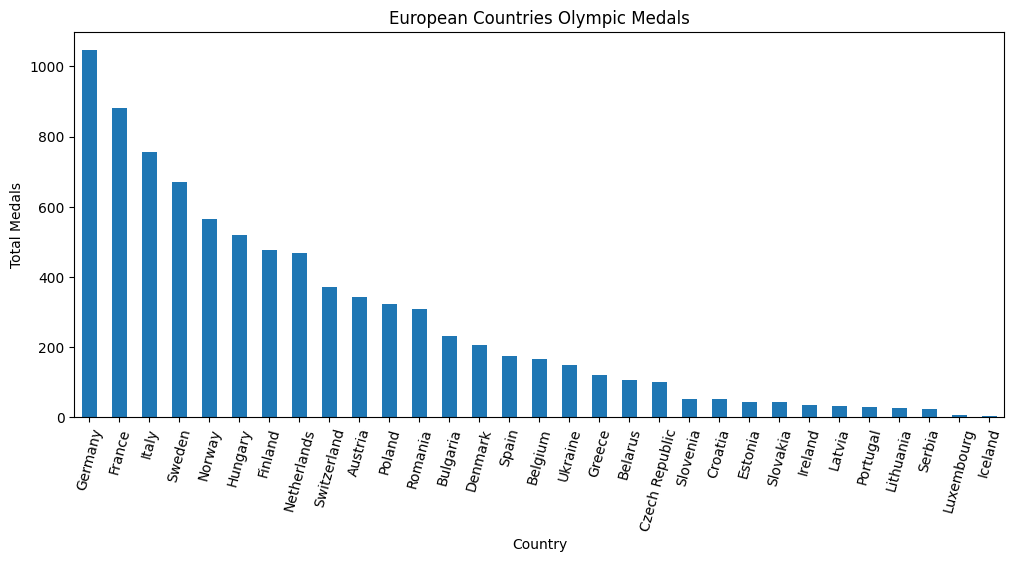

In [16]:
plt.figure(figsize=(12,5))
europe_rank.plot(kind="bar")
plt.title("European Countries Olympic Medals")
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.xticks(rotation=75)
plt.show()


In [ ]:
Top 10 pays – Médailles d’OR